# Predicting Time Series

see [this post](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3)

In [113]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [114]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [115]:
y.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [116]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

In [117]:
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [118]:
y.bfill().head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [44]:
# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())
# TODO why is y.bfill passed to the fillna method?

In [45]:
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

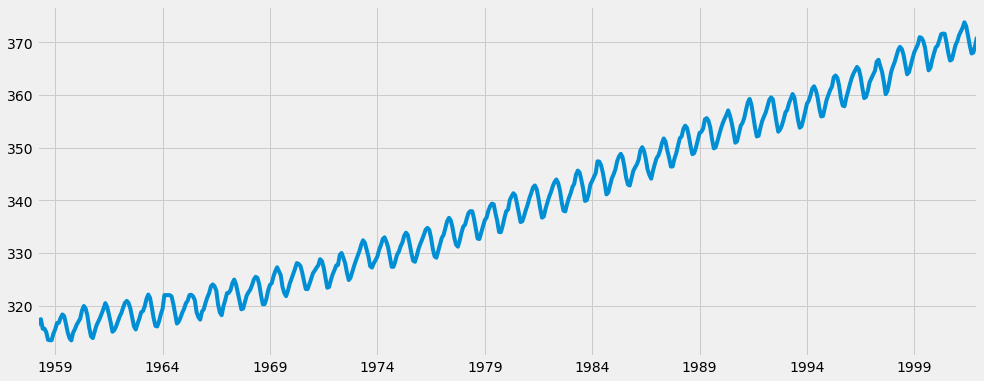

In [46]:
y.plot(figsize=(15, 6))
plt.show()

# ARIMA

In [119]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

In [120]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [121]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [122]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [123]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6755.420874402038
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1560.6372600043383
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1079.1960569449739
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1044.2875158145955
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1329.6386950865049
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1022.894128027407
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6824.789552500253
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6046.532278813018
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1382.001553130763
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1210.2784259152395
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:777.9307460449188
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:763.1092391728854
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1093.8494048760363
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:779.1342459324508
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1209.866211784796
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:277.2071839378159
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:557.4612139939659
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:318.53753932383745
ARI

In [124]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [125]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.1296,0.122,1.058,0.290,-0.110,0.370
ma.L1,-0.4792,0.111,-4.334,0.000,-0.696,-0.262
ar.S.L12,0.0014,0.002,0.925,0.355,-0.002,0.004
ma.S.L12,-0.8603,0.027,-31.652,0.000,-0.914,-0.807
sigma2,0.0860,0.006,15.404,0.000,0.075,0.097


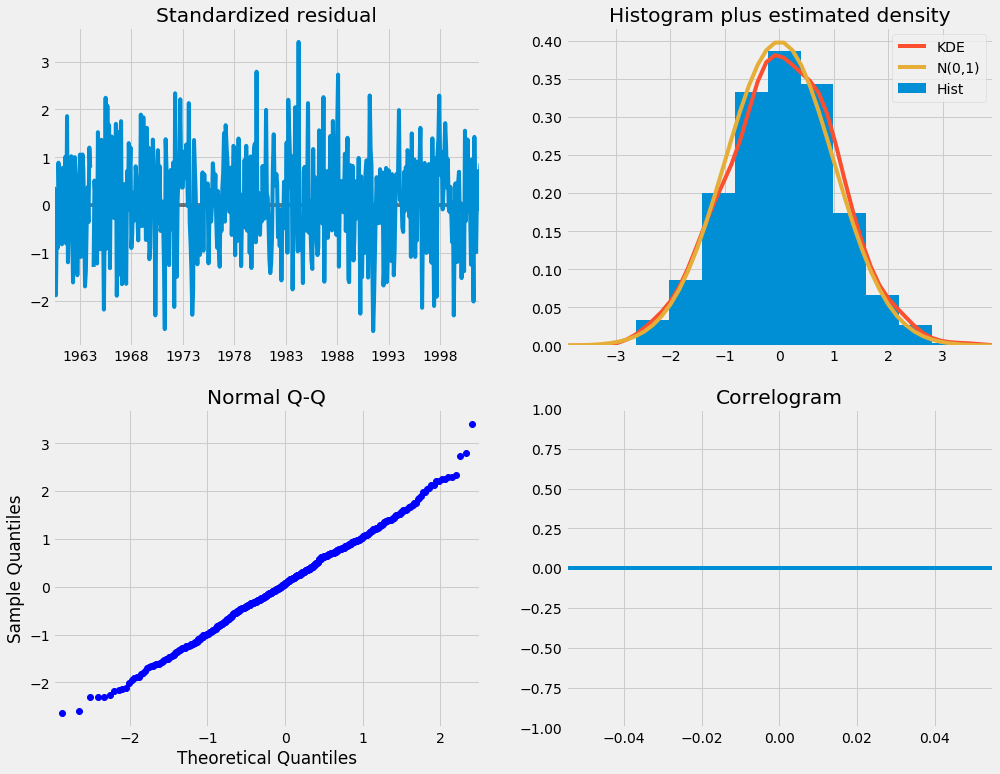

In [126]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting

In [127]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [128]:
pred_ci.size

96

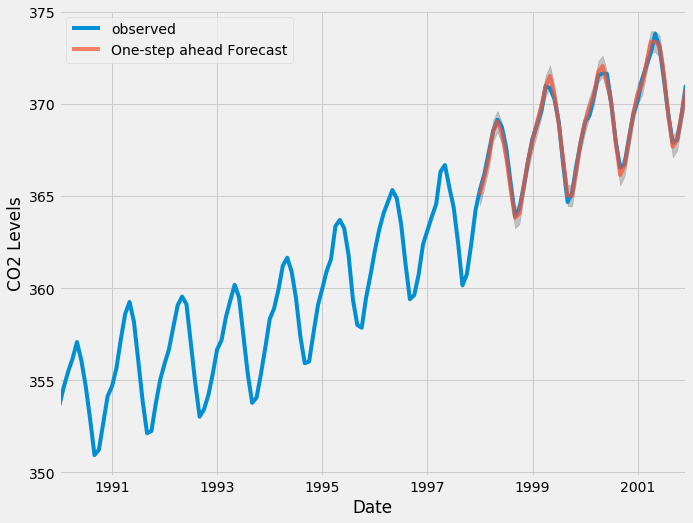

In [129]:
# from 1990 onwards
ax = y['1990':].plot(label='observed', figsize=(10, 8))

# add predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# add confidence intervals
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

# set graph info (axes and legend)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

# render!
plt.show()

# Find error

In [130]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


# Dynamic forecasts

In [131]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

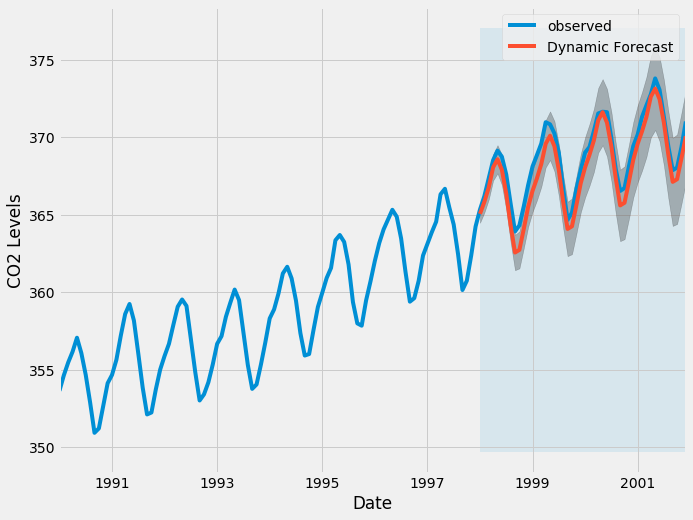

In [132]:
ax = y['1990':].plot(label='observed', figsize=(10, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

# from start of prediction until last value
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [133]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.84


# Future forecasts

In [134]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

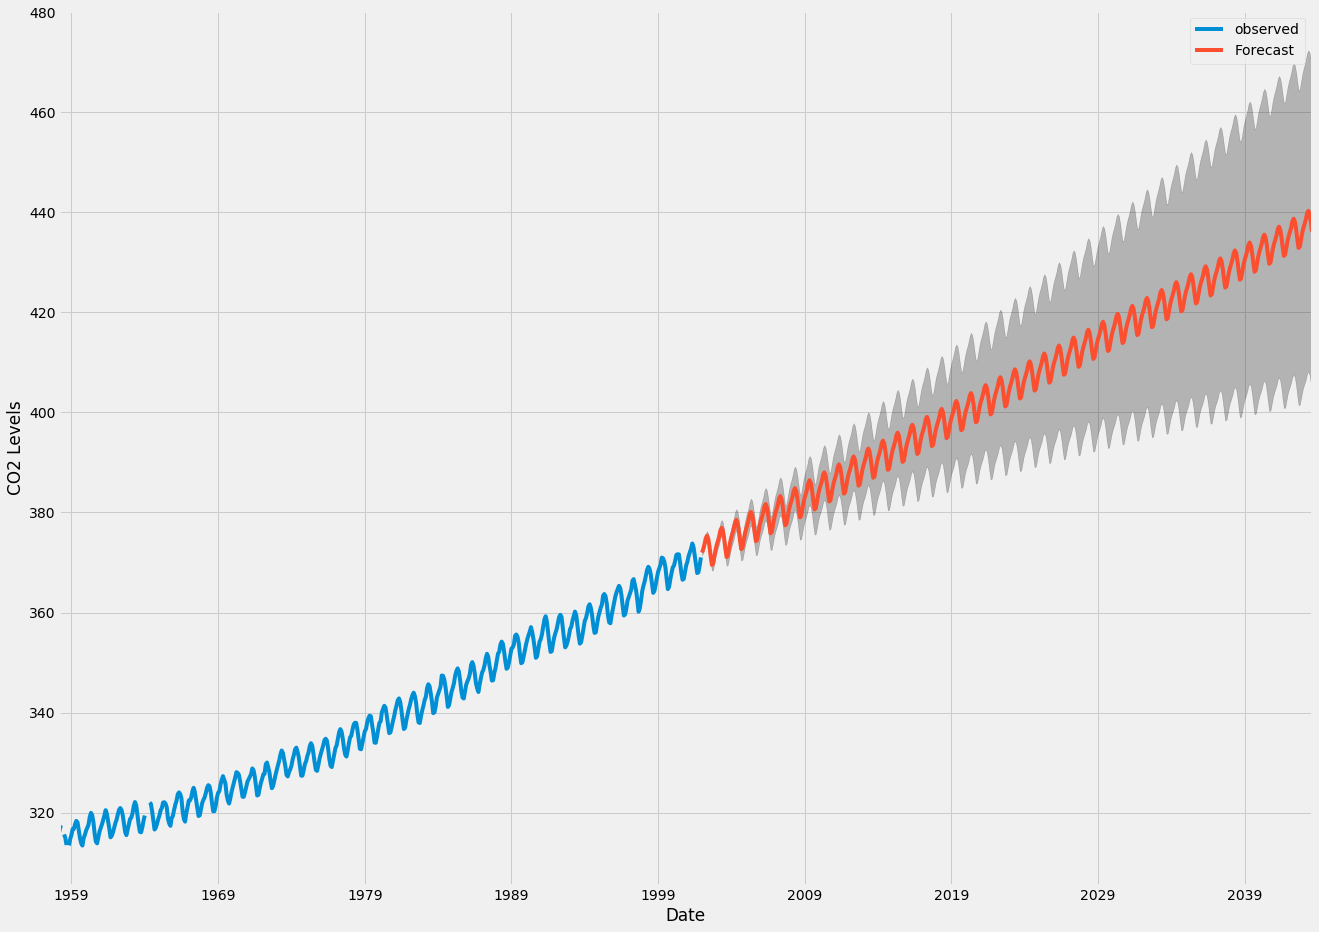

In [135]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

# Find date when we exceed threshold

In [136]:
series = pred_uc.predicted_mean
series

2002-01-01    371.972721
2002-02-01    372.760002
2002-03-01    373.676024
2002-04-01    374.868420
2002-05-01    375.353122
2002-06-01    374.778359
2002-07-01    373.257383
2002-08-01    371.227905
2002-09-01    369.515920
2002-10-01    369.738168
2002-11-01    371.097284
2002-12-01    372.517464
2003-01-01    373.546357
2003-02-01    374.342959
2003-03-01    375.260511
2003-04-01    376.453745
2003-05-01    376.937707
2003-06-01    376.363180
2003-07-01    374.842541
2003-08-01    372.812846
2003-09-01    371.100626
2003-10-01    371.322947
2003-11-01    372.682111
2003-12-01    374.101973
2004-01-01    375.130974
2004-02-01    375.927589
2004-03-01    376.845144
2004-04-01    378.038379
2004-05-01    378.522339
2004-06-01    377.947813
                 ...    
2041-03-01    435.476553
2041-04-01    436.669788
2041-05-01    437.153749
2041-06-01    436.579222
2041-07-01    435.058584
2041-08-01    433.028888
2041-09-01    431.316668
2041-10-01    431.538989
2041-11-01    432.898153


In [137]:
data = pred_uc.predicted_mean.to_frame()
data

,0
2002-01-01,371.972721
2002-02-01,372.760002
2002-03-01,373.676024
2002-04-01,374.868420
2002-05-01,375.353122
2002-06-01,374.778359
2002-07-01,373.257383
2002-08-01,371.227905
2002-09-01,369.515920
2002-10-01,369.738168


In [138]:
series[series > 400].head(1)

2018-04-01    400.223237
dtype: float64